##                                                Movie Recommendation by Prabhat

## Importing the Library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
#Loading the Dataset
rating  = pd.read_csv('ml-100k/u.data',sep='\t', names=['user_id','item_id','rating','timestamp'])
print(rating)

       user_id  item_id  rating  timestamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
...        ...      ...     ...        ...
99995      880      476       3  880175444
99996      716      204       5  879795543
99997      276     1090       1  874795795
99998       13      225       2  882399156
99999       12      203       3  879959583

[100000 rows x 4 columns]


In [25]:
movies = pd.read_csv('ml-100k/u.item',sep='|',header=None, encoding='latin-1',names =['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 
                             'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 
                             'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
                             'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
# print(movies)

      item_id                                      title release_date  \
0           1                           Toy Story (1995)  01-Jan-1995   
1           2                           GoldenEye (1995)  01-Jan-1995   
2           3                          Four Rooms (1995)  01-Jan-1995   
3           4                          Get Shorty (1995)  01-Jan-1995   
4           5                             Copycat (1995)  01-Jan-1995   
...       ...                                        ...          ...   
1677     1678                          Mat' i syn (1997)  06-Feb-1998   
1678     1679                           B. Monkey (1998)  06-Feb-1998   
1679     1680                       Sliding Doors (1998)  01-Jan-1998   
1680     1681                        You So Crazy (1994)  01-Jan-1994   
1681     1682  Scream of Stone (Schrei aus Stein) (1991)  08-Mar-1996   

      video_release_date                                           IMDb_URL  \
0                    NaN  http://us.imdb.com

In [19]:
users = pd.read_csv('ml-100k/u.user',sep='|',names = ['user_id','age','gender','occupation','zip-code'])
print(users)

     user_id  age gender     occupation zip-code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


In [31]:
# Merging the movies with rating
merged = pd.merge(rating,movies[['item_id','title']],on='item_id')
print(merged)

       user_id  item_id  rating  timestamp                         title
0          196      242       3  881250949                  Kolya (1996)
1          186      302       3  891717742      L.A. Confidential (1997)
2           22      377       1  878887116           Heavyweights (1994)
3          244       51       2  880606923    Legends of the Fall (1994)
4          166      346       1  886397596           Jackie Brown (1997)
...        ...      ...     ...        ...                           ...
99995      880      476       3  880175444  First Wives Club, The (1996)
99996      716      204       5  879795543     Back to the Future (1985)
99997      276     1090       1  874795795                 Sliver (1993)
99998       13      225       2  882399156         101 Dalmatians (1996)
99999       12      203       3  879959583             Unforgiven (1992)

[100000 rows x 5 columns]


In [57]:
## Taking the input from the user for ratings 
def get_user_rating():
    print("Rate the movie:\n")
    user_ratings = {}
    while True:
        movie_title = input("Enter the movie title or type 'done': ").strip()
        if movie_title.lower()=='done':
            break
        ratings = input(f"Rate: {movie_title} on a scale of 1 to 5").strip()
        user_ratings[movie_title] = ratings
    return user_ratings
user_ratings = get_user_rating()

Rate the movie:



Enter the movie title or type 'done':  Sholay
Rate: Sholay on a scale of 1 to 5 4
Enter the movie title or type 'done':  done


In [59]:
## similiarity calculation 
from sklearn.metrics.pairwise import cosine_similarity

user_movie_matrix = merged.pivot_table(index = 'user_id',columns = 'title',values = 'rating').fillna(0)
similiarity = cosine_similarity(user_movie_matrix)
similiarity_df = pd.DataFrame(similiarity,index=user_movie_matrix.index,columns=user_movie_matrix.index)
print(similiarity_df.head(7))

user_id       1         2         3         4         5         6         7    \
user_id                                                                         
1        1.000000  0.168937  0.048388  0.064561  0.379670  0.429682  0.443097   
2        0.168937  1.000000  0.113393  0.179694  0.073623  0.242106  0.108604   
3        0.048388  0.113393  1.000000  0.349781  0.021592  0.074018  0.067423   
4        0.064561  0.179694  0.349781  1.000000  0.031804  0.068431  0.091507   
5        0.379670  0.073623  0.021592  0.031804  1.000000  0.238636  0.374733   
6        0.429682  0.242106  0.074018  0.068431  0.238636  1.000000  0.493529   
7        0.443097  0.108604  0.067423  0.091507  0.374733  0.493529  1.000000   

user_id       8         9         10   ...       934       935       936  \
user_id                                ...                                 
1        0.320079  0.078385  0.377733  ...  0.372213  0.119860  0.269860   
2        0.104257  0.162470  0.161273  ...

## Recommend Movie

In [61]:
# Get the most similiar users
user_id = 1 # lets take this as example
similiar_user = similiarity_df[user_id].sort_values(ascending=False).iloc[1:6].index
# Get the top-rated movie
recommendations = user_movie_matrix.loc[similiar_user].mean(axis=0).sort_values(ascending=False)
# Filter the movie ,the user has already rated
recommendations  = recommendations[~recommendations.index.isin(user_ratings.keys())]
print(recommendations.head(5))

title
Star Wars (1977)                   5.0
Raiders of the Lost Ark (1981)     5.0
Aliens (1986)                      4.8
Empire Strikes Back, The (1980)    4.8
Citizen Kane (1941)                4.8
dtype: float64


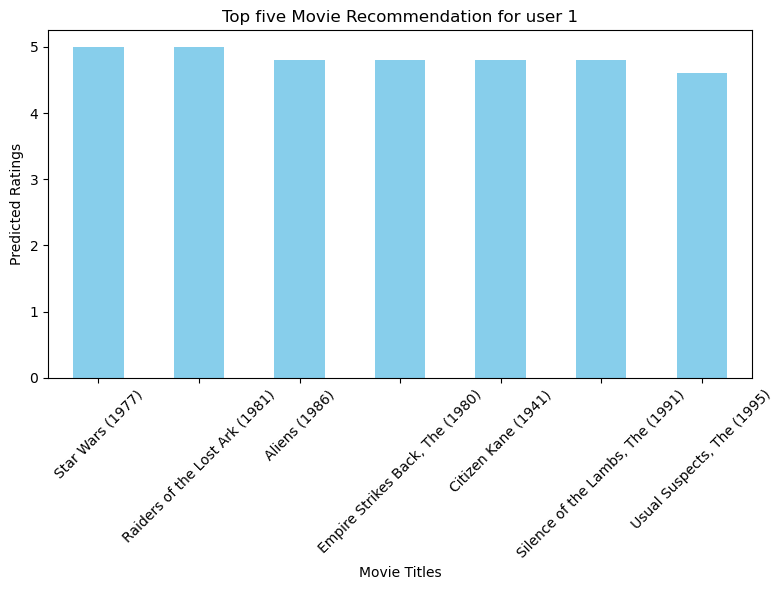

In [67]:
# Visuals
top_movie = recommendations.head(7)
plt.figure(figsize=(8,6))
top_movie.plot(kind='bar',color='skyblue')
plt.title(f"Top five Movie Recommendation for user {user_id}")
plt.xlabel("Movie Titles")
plt.ylabel("Predicted Ratings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()